In [2]:
# Import libs 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read dataset. While reading make date column dataframe index and parse date column as timestamp
dataframe = pd.read_csv("assignment.csv", parse_dates=['date'], index_col="date")

In [4]:
# First overview of dataset
dataframe.head()

,daily worker count
date,
2013-01-24,1
2013-01-25,1
2013-01-26,1
2013-01-27,2
2013-01-29,1


## As we see above. The index is not sorted. We should sort it.

In [5]:
# Sort index and assign dataframe again
dataframe = dataframe.sort_index()

# Let's see if dataframe index is sorted?
dataframe.head()

,daily worker count
date,
2013-01-02,4
2013-01-03,4
2013-01-04,5
2013-01-05,4
2013-01-06,4


In [6]:
# change column names. We don't want blanks in column names. So we replace underscores.
# create new python list for new column names
column_names = ['daily_worker_count']

# assign newly created column names list to dataframe columns
dataframe.columns = column_names

# Check if new column names is assigned
dataframe.columns

Index(['daily_worker_count'], dtype='object')

## Graphical overview of timeseries

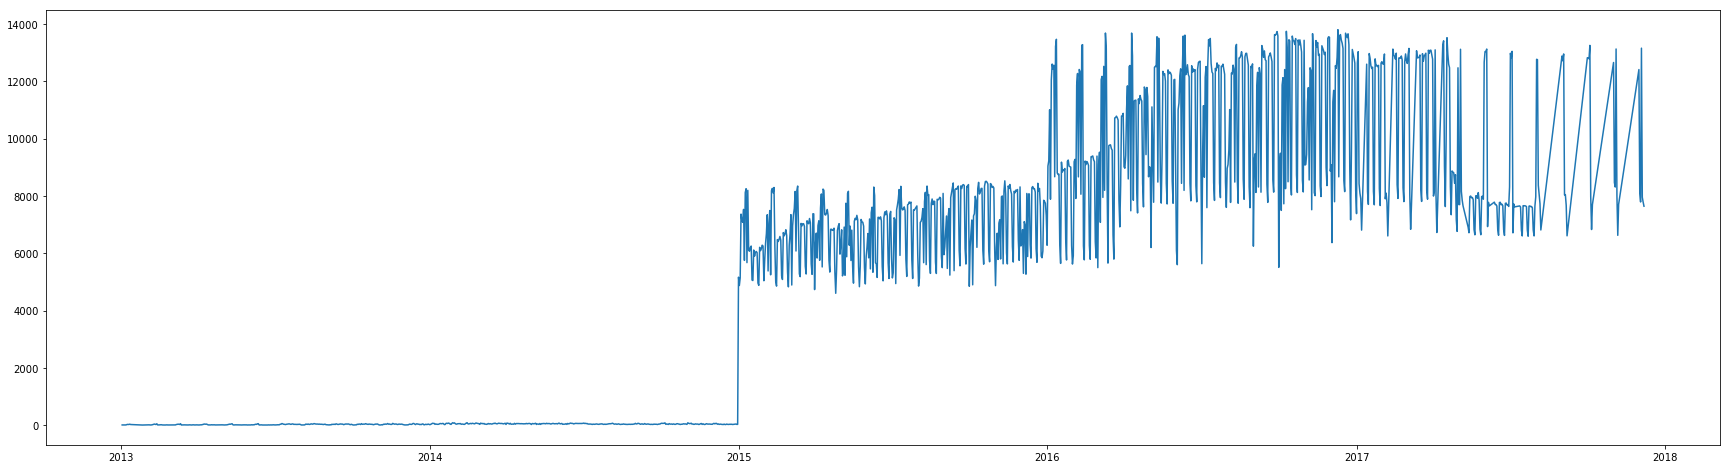

In [8]:
# convert pandas series
dataframe_pd_series = dataframe['daily_worker_count']
# declare the canvas size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 8

# Plot time series
plt.plot(dataframe_pd_series)

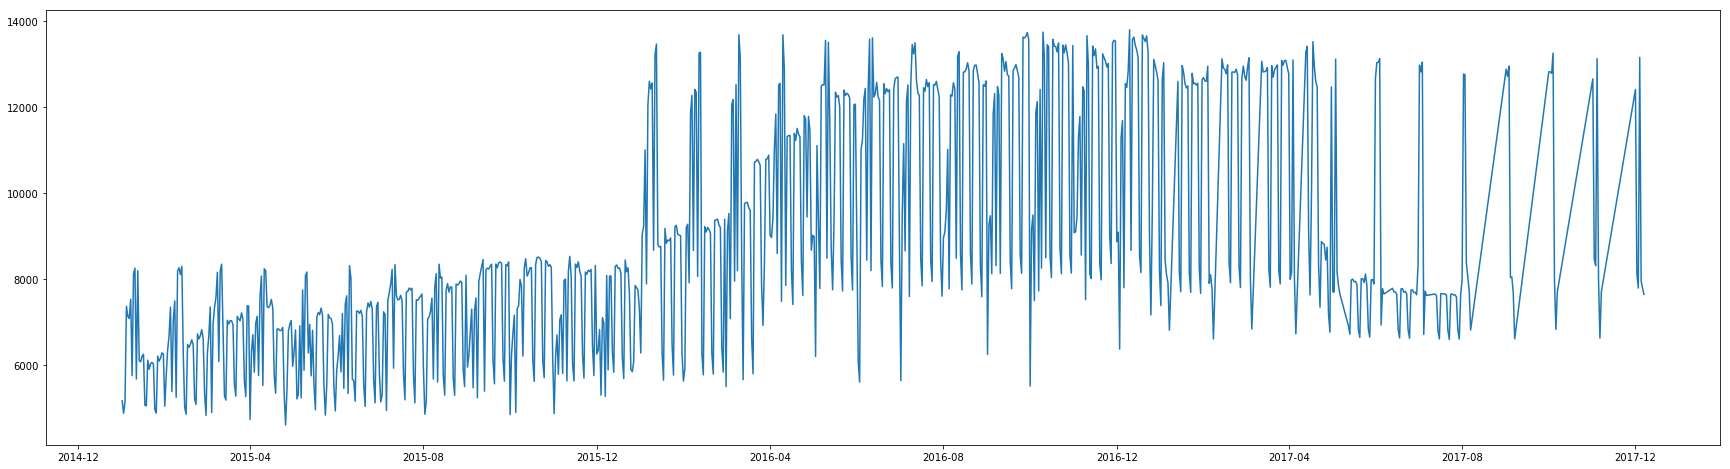

In [9]:
# As seen above the behaviour of data between 2013 and 2015 is quite different from post 2015.

dataframe = dataframe[dataframe.index >= '2015-01-01']

# convert pandas series
dataframe_pd_series = dataframe['daily_worker_count']
# declare the canvas size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 8

# Plot time series
plt.plot(dataframe_pd_series)

In [11]:
# Extract some new features from dataframe index(datetimeindex)
# We create three new features 
dataframe['year'] = dataframe.index.year
dataframe['day_of_month'] = dataframe.index.day
dataframe['month'] = dataframe.index.month
dataframe['day_of_week'] = dataframe.index.dayofweek
dataframe['quarter'] = dataframe.index.quarter


# See if new features has properly created
dataframe.head()

,daily_worker_count,year,day_of_month,month,day_of_week,quarter
date,,,,,,
2015-01-01,5164,2015,1,1,3,1
2015-01-02,4873,2015,2,1,4,1
2015-01-03,5140,2015,3,1,5,1
2015-01-04,7366,2015,4,1,6,1
2015-01-05,7132,2015,5,1,0,1


In [12]:
# Check outliers in year, month and day
print("max month:", dataframe.month.max())
print("min month:", dataframe.month.min())
print("max year:", dataframe.year.max())
print("min year:", dataframe.year.min())
print("max day of month:", dataframe.day_of_month.max())
print("min day of month:", dataframe.day_of_month.min())
print("max day of week:", dataframe.day_of_week.max())
print("min day of week:", dataframe.day_of_week.min())

max month: 12
min month: 1
max year: 2017
min year: 2015
max day of month: 31
min day of month: 1
max day of week: 6
min day of week: 0


In [13]:
# Split columns into features and target values
X = dataframe.iloc[:, 1:].values
y = dataframe.iloc[:, 0].values

In [14]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Nitelikler matrisini (X) StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\toshiba\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [18]:
regressor = Sequential()

In [29]:
regressor.add(Dense(kernel_initializer = 'uniform', input_dim = 5, units = 26,  activation = 'relu'))

In [30]:
regressor.add(Dense(kernel_initializer = 'uniform', units = 24,  activation = 'relu'))

In [31]:
regressor.add(Dense(kernel_initializer = 'uniform', units = 1,  activation = 'linear'))

In [32]:
regressor.compile(optimizer='adam', loss='mse')

In [36]:
regressor.fit(X_train, y_train, batch_size=5, epochs=2000)

Epoch 1/2000
754/754 [==============================] - 0s 190us/step - loss: 4769232.3827
Epoch 2/2000
754/754 [==============================] - 0s 180us/step - loss: 4768326.8324
Epoch 3/2000
754/754 [==============================] - 0s 179us/step - loss: 4815191.1617
Epoch 4/2000
754/754 [==============================] - 0s 182us/step - loss: 4774941.9019
Epoch 5/2000
754/754 [==============================] - 0s 178us/step - loss: 4756772.4902
Epoch 6/2000
754/754 [==============================] - 0s 179us/step - loss: 4804705.3534
Epoch 7/2000
754/754 [==============================] - 0s 178us/step - loss: 4759247.2487
Epoch 8/2000
754/754 [==============================] - 0s 180us/step - loss: 4693916.4074
Epoch 9/2000
754/754 [==============================] - 0s 181us/step - loss: 4849678.1834
Epoch 10/2000
754/754 [==============================] - 0s 181us/step - loss: 4765491.3703
Epoch 11/2000
754/754 [==============================] - 0s 180us/step - loss: 4720701.74

754/754 [==============================] - 0s 172us/step - loss: 4756364.7910
Epoch 91/2000
754/754 [==============================] - 0s 166us/step - loss: 4681674.0780
Epoch 92/2000
754/754 [==============================] - 0s 166us/step - loss: 4670417.1916
Epoch 93/2000
754/754 [==============================] - 0s 167us/step - loss: 4715418.4461
Epoch 94/2000
754/754 [==============================] - 0s 166us/step - loss: 4754656.1233
Epoch 95/2000
754/754 [==============================] - 0s 167us/step - loss: 4748516.3257
Epoch 96/2000
754/754 [==============================] - 0s 167us/step - loss: 4788726.0755
Epoch 97/2000
754/754 [==============================] - 0s 166us/step - loss: 4783384.8833
Epoch 98/2000
754/754 [==============================] - 0s 166us/step - loss: 4868930.8687
Epoch 99/2000
754/754 [==============================] - 0s 170us/step - loss: 4805506.1765
Epoch 100/2000
754/754 [==============================] - 0s 167us/step - loss: 4806511.5237
E

754/754 [==============================] - 0s 175us/step - loss: 4715943.7666
Epoch 179/2000
754/754 [==============================] - 0s 174us/step - loss: 4750305.9100
Epoch 180/2000
754/754 [==============================] - 0s 175us/step - loss: 4735058.7378
Epoch 181/2000
754/754 [==============================] - 0s 170us/step - loss: 4769383.6421
Epoch 182/2000
754/754 [==============================] - 0s 164us/step - loss: 4787653.7059
Epoch 183/2000
754/754 [==============================] - 0s 168us/step - loss: 4782363.0869
Epoch 184/2000
754/754 [==============================] - 0s 167us/step - loss: 4729769.6664
Epoch 185/2000
754/754 [==============================] - 0s 170us/step - loss: 4761320.5601
Epoch 186/2000
754/754 [==============================] - 0s 166us/step - loss: 4767883.3723
Epoch 187/2000
754/754 [==============================] - 0s 168us/step - loss: 4776740.3670
Epoch 188/2000
754/754 [==============================] - 0s 168us/step - loss: 47577

Epoch 266/2000
754/754 [==============================] - 0s 174us/step - loss: 4725638.9341
Epoch 267/2000
754/754 [==============================] - 0s 162us/step - loss: 4686303.2098
Epoch 268/2000
754/754 [==============================] - 0s 166us/step - loss: 4741023.7535
Epoch 269/2000
754/754 [==============================] - 0s 172us/step - loss: 4654954.9513
Epoch 270/2000
754/754 [==============================] - 0s 169us/step - loss: 4770766.8181
Epoch 271/2000
754/754 [==============================] - 0s 168us/step - loss: 4726729.4564
Epoch 272/2000
754/754 [==============================] - 0s 172us/step - loss: 4750773.9308
Epoch 273/2000
754/754 [==============================] - 0s 171us/step - loss: 4837471.9449
Epoch 274/2000
754/754 [==============================] - 0s 165us/step - loss: 4784762.4919
Epoch 275/2000
754/754 [==============================] - 0s 177us/step - loss: 4746852.9998
Epoch 276/2000
754/754 [==============================] - 0s 163us/ste

754/754 [==============================] - 0s 190us/step - loss: 4758705.0326
Epoch 355/2000
754/754 [==============================] - 0s 166us/step - loss: 4743654.1724
Epoch 356/2000
754/754 [==============================] - 0s 169us/step - loss: 4731362.8140
Epoch 357/2000
754/754 [==============================] - 0s 170us/step - loss: 4702745.9998
Epoch 358/2000
754/754 [==============================] - 0s 174us/step - loss: 4722260.9056
Epoch 359/2000
754/754 [==============================] - 0s 170us/step - loss: 4736609.6718
Epoch 360/2000
754/754 [==============================] - 0s 170us/step - loss: 4708104.4658
Epoch 361/2000
754/754 [==============================] - 0s 204us/step - loss: 4714208.6036
Epoch 362/2000
754/754 [==============================] - 0s 182us/step - loss: 4738524.2711
Epoch 363/2000
754/754 [==============================] - 0s 180us/step - loss: 4719933.4959
Epoch 364/2000
754/754 [==============================] - 0s 187us/step - loss: 47786

754/754 [==============================] - 0s 166us/step - loss: 4776864.0826
Epoch 442/2000
754/754 [==============================] - 0s 168us/step - loss: 4735289.5029
Epoch 443/2000
754/754 [==============================] - 0s 171us/step - loss: 4722190.2439
Epoch 444/2000
754/754 [==============================] - 0s 176us/step - loss: 4758110.4151
Epoch 445/2000
754/754 [==============================] - 0s 174us/step - loss: 4689787.7921
Epoch 446/2000
754/754 [==============================] - 0s 178us/step - loss: 4767538.1466
Epoch 447/2000
754/754 [==============================] - 0s 172us/step - loss: 4708608.3947
Epoch 448/2000
754/754 [==============================] - 0s 171us/step - loss: 4725800.7052
Epoch 449/2000
754/754 [==============================] - 0s 166us/step - loss: 4718496.1370
Epoch 450/2000
754/754 [==============================] - 0s 167us/step - loss: 4724430.9831
Epoch 451/2000
754/754 [==============================] - 0s 168us/step - loss: 46830

754/754 [==============================] - 0s 171us/step - loss: 4671509.7492
Epoch 530/2000
754/754 [==============================] - 0s 170us/step - loss: 4783853.4828
Epoch 531/2000
754/754 [==============================] - 0s 169us/step - loss: 4813111.7376
Epoch 532/2000
754/754 [==============================] - 0s 171us/step - loss: 4694220.2157
Epoch 533/2000
754/754 [==============================] - 0s 168us/step - loss: 4737296.6254
Epoch 534/2000
754/754 [==============================] - 0s 171us/step - loss: 4741283.4138
Epoch 535/2000
754/754 [==============================] - 0s 170us/step - loss: 4721729.2778
Epoch 536/2000
754/754 [==============================] - 0s 171us/step - loss: 4670899.2304
Epoch 537/2000
754/754 [==============================] - 0s 168us/step - loss: 4783019.3802
Epoch 538/2000
754/754 [==============================] - 0s 171us/step - loss: 4697122.8851
Epoch 539/2000
754/754 [==============================] - 0s 173us/step - loss: 47252

754/754 [==============================] - 0s 174us/step - loss: 4769986.8412
Epoch 618/2000
754/754 [==============================] - 0s 170us/step - loss: 4726645.3517
Epoch 619/2000
754/754 [==============================] - 0s 171us/step - loss: 4720551.8462
Epoch 620/2000
754/754 [==============================] - 0s 174us/step - loss: 4716087.0373
Epoch 621/2000
754/754 [==============================] - 0s 172us/step - loss: 4725320.3874
Epoch 622/2000
754/754 [==============================] - 0s 171us/step - loss: 4823755.3654
Epoch 623/2000
754/754 [==============================] - 0s 170us/step - loss: 4732151.4913
Epoch 624/2000
754/754 [==============================] - 0s 177us/step - loss: 4719636.6433
Epoch 625/2000
754/754 [==============================] - 0s 174us/step - loss: 4705590.2625
Epoch 626/2000
754/754 [==============================] - 0s 172us/step - loss: 4761876.5908
Epoch 627/2000
754/754 [==============================] - 0s 177us/step - loss: 46936

754/754 [==============================] - 0s 175us/step - loss: 4702463.6290
Epoch 706/2000
754/754 [==============================] - 0s 175us/step - loss: 4728685.9903
Epoch 707/2000
754/754 [==============================] - 0s 171us/step - loss: 4703575.3671
Epoch 708/2000
754/754 [==============================] - 0s 171us/step - loss: 4723637.9273
Epoch 709/2000
754/754 [==============================] - 0s 168us/step - loss: 4729507.3482
Epoch 710/2000
754/754 [==============================] - 0s 172us/step - loss: 4691001.2682
Epoch 711/2000
754/754 [==============================] - 0s 172us/step - loss: 4696313.2243
Epoch 712/2000
754/754 [==============================] - 0s 172us/step - loss: 4711266.0092
Epoch 713/2000
754/754 [==============================] - 0s 174us/step - loss: 4662456.7253
Epoch 714/2000
754/754 [==============================] - 0s 174us/step - loss: 4722980.6155
Epoch 715/2000
754/754 [==============================] - 0s 175us/step - loss: 47168

754/754 [==============================] - 0s 172us/step - loss: 4686760.8642
Epoch 794/2000
754/754 [==============================] - 0s 170us/step - loss: 4703869.2712
Epoch 795/2000
754/754 [==============================] - 0s 168us/step - loss: 4767770.4691
Epoch 796/2000
754/754 [==============================] - 0s 170us/step - loss: 4704280.6904
Epoch 797/2000
754/754 [==============================] - 0s 168us/step - loss: 4683860.6483
Epoch 798/2000
754/754 [==============================] - 0s 171us/step - loss: 4750508.0155
Epoch 799/2000
754/754 [==============================] - 0s 175us/step - loss: 4753364.1729
Epoch 800/2000
754/754 [==============================] - 0s 175us/step - loss: 4726994.6581
Epoch 801/2000
754/754 [==============================] - 0s 174us/step - loss: 4682688.6972
Epoch 802/2000
754/754 [==============================] - 0s 174us/step - loss: 4667591.5650
Epoch 803/2000
754/754 [==============================] - 0s 172us/step - loss: 46581

754/754 [==============================] - 0s 167us/step - loss: 4657108.1931
Epoch 882/2000
754/754 [==============================] - ETA: 0s - loss: 4739558.798 - 0s 167us/step - loss: 4696803.4532
Epoch 883/2000
754/754 [==============================] - 0s 166us/step - loss: 4703889.4267
Epoch 884/2000
754/754 [==============================] - 0s 167us/step - loss: 4678442.3297
Epoch 885/2000
754/754 [==============================] - 0s 170us/step - loss: 4688167.7772
Epoch 886/2000
754/754 [==============================] - 0s 170us/step - loss: 4709884.2314
Epoch 887/2000
754/754 [==============================] - 0s 168us/step - loss: 4720562.6302
Epoch 888/2000
754/754 [==============================] - 0s 170us/step - loss: 4712825.5516
Epoch 889/2000
754/754 [==============================] - 0s 170us/step - loss: 4670202.9938
Epoch 890/2000
754/754 [==============================] - 0s 170us/step - loss: 4797761.2267
Epoch 891/2000
754/754 [==============================]

Epoch 969/2000
754/754 [==============================] - 0s 167us/step - loss: 4719579.4281
Epoch 970/2000
754/754 [==============================] - 0s 167us/step - loss: 4670783.0489
Epoch 971/2000
754/754 [==============================] - 0s 166us/step - loss: 4747546.5104
Epoch 972/2000
754/754 [==============================] - 0s 171us/step - loss: 4674440.0784
Epoch 973/2000
754/754 [==============================] - 0s 172us/step - loss: 4671546.6824
Epoch 974/2000
754/754 [==============================] - 0s 168us/step - loss: 4681905.3103
Epoch 975/2000
754/754 [==============================] - 0s 170us/step - loss: 4659221.7118
Epoch 976/2000
754/754 [==============================] - 0s 173us/step - loss: 4666947.9410
Epoch 977/2000
754/754 [==============================] - 0s 172us/step - loss: 4659067.7551
Epoch 978/2000
754/754 [==============================] - 0s 174us/step - loss: 4738413.9906
Epoch 979/2000
754/754 [==============================] - 0s 174us/ste

754/754 [==============================] - 0s 166us/step - loss: 4673281.8001
Epoch 1057/2000
754/754 [==============================] - 0s 166us/step - loss: 4704485.7643
Epoch 1058/2000
754/754 [==============================] - 0s 186us/step - loss: 4704670.0187
Epoch 1059/2000
754/754 [==============================] - 0s 164us/step - loss: 4731364.0171
Epoch 1060/2000
754/754 [==============================] - 0s 167us/step - loss: 4634430.8968
Epoch 1061/2000
754/754 [==============================] - 0s 167us/step - loss: 4738288.2230
Epoch 1062/2000
754/754 [==============================] - 0s 164us/step - loss: 4724505.0353
Epoch 1063/2000
754/754 [==============================] - 0s 167us/step - loss: 4715592.3922
Epoch 1064/2000
754/754 [==============================] - 0s 169us/step - loss: 4695806.7851
Epoch 1065/2000
754/754 [==============================] - 0s 170us/step - loss: 4700389.0270
Epoch 1066/2000
754/754 [==============================] - 0s 173us/step - l

754/754 [==============================] - 0s 200us/step - loss: 4685602.9393
Epoch 1143/2000
754/754 [==============================] - 0s 203us/step - loss: 4679768.3412
Epoch 1144/2000
754/754 [==============================] - 0s 199us/step - loss: 4684455.5323
Epoch 1145/2000
754/754 [==============================] - 0s 174us/step - loss: 4659126.1218 0s - loss: 4647892.771
Epoch 1146/2000
754/754 [==============================] - 0s 171us/step - loss: 4656268.6580
Epoch 1147/2000
754/754 [==============================] - 0s 175us/step - loss: 4681780.4829
Epoch 1148/2000
754/754 [==============================] - 0s 175us/step - loss: 4676922.5183
Epoch 1149/2000
754/754 [==============================] - 0s 178us/step - loss: 4653800.9676
Epoch 1150/2000
754/754 [==============================] - 0s 182us/step - loss: 4654692.5121
Epoch 1151/2000
754/754 [==============================] - 0s 182us/step - loss: 4674160.8929
Epoch 1152/2000
754/754 [============================

754/754 [==============================] - 0s 166us/step - loss: 4685033.0866
Epoch 1230/2000
754/754 [==============================] - 0s 167us/step - loss: 4639866.7479
Epoch 1231/2000
754/754 [==============================] - 0s 168us/step - loss: 4656756.4000
Epoch 1232/2000
754/754 [==============================] - 0s 170us/step - loss: 4676168.5271
Epoch 1233/2000
754/754 [==============================] - 0s 169us/step - loss: 4654314.6306
Epoch 1234/2000
754/754 [==============================] - 0s 171us/step - loss: 4651281.3857
Epoch 1235/2000
754/754 [==============================] - 0s 173us/step - loss: 4664685.1045
Epoch 1236/2000
754/754 [==============================] - 0s 170us/step - loss: 4690062.7541
Epoch 1237/2000
754/754 [==============================] - 0s 167us/step - loss: 4658969.4167
Epoch 1238/2000
754/754 [==============================] - 0s 171us/step - loss: 4585035.7730
Epoch 1239/2000
754/754 [==============================] - 0s 169us/step - l

754/754 [==============================] - 0s 176us/step - loss: 4661908.4985
Epoch 1316/2000
754/754 [==============================] - 0s 176us/step - loss: 4662715.1144
Epoch 1317/2000
754/754 [==============================] - 0s 204us/step - loss: 4674144.4300
Epoch 1318/2000
754/754 [==============================] - 0s 191us/step - loss: 4672299.2203
Epoch 1319/2000
754/754 [==============================] - 0s 190us/step - loss: 4631191.1832
Epoch 1320/2000
754/754 [==============================] - 0s 184us/step - loss: 4638041.8917
Epoch 1321/2000
754/754 [==============================] - 0s 182us/step - loss: 4654833.8172
Epoch 1322/2000
754/754 [==============================] - 0s 182us/step - loss: 4669444.1142
Epoch 1323/2000
754/754 [==============================] - 0s 175us/step - loss: 4653388.0264
Epoch 1324/2000
754/754 [==============================] - 0s 174us/step - loss: 4655765.3517
Epoch 1325/2000
754/754 [==============================] - 0s 172us/step - l

754/754 [==============================] - 0s 176us/step - loss: 4648226.1375
Epoch 1403/2000
754/754 [==============================] - 0s 172us/step - loss: 4640412.7843
Epoch 1404/2000
754/754 [==============================] - 0s 172us/step - loss: 4628636.2416
Epoch 1405/2000
754/754 [==============================] - 0s 186us/step - loss: 4666978.7945
Epoch 1406/2000
754/754 [==============================] - 0s 175us/step - loss: 4666461.1569
Epoch 1407/2000
754/754 [==============================] - 0s 174us/step - loss: 4666351.6845
Epoch 1408/2000
754/754 [==============================] - 0s 176us/step - loss: 4650477.2422
Epoch 1409/2000
754/754 [==============================] - 0s 199us/step - loss: 4702836.3384
Epoch 1410/2000
754/754 [==============================] - 0s 190us/step - loss: 4629886.3090
Epoch 1411/2000
754/754 [==============================] - 0s 180us/step - loss: 4641258.4685
Epoch 1412/2000
754/754 [==============================] - 0s 174us/step - l

754/754 [==============================] - 0s 190us/step - loss: 4631434.3577
Epoch 1490/2000
754/754 [==============================] - 0s 194us/step - loss: 4644168.0560
Epoch 1491/2000
754/754 [==============================] - 0s 194us/step - loss: 4621492.4964
Epoch 1492/2000
754/754 [==============================] - 0s 180us/step - loss: 4651962.6182 0s - loss: 4361065.98
Epoch 1493/2000
754/754 [==============================] - 0s 183us/step - loss: 4656252.0536
Epoch 1494/2000
754/754 [==============================] - 0s 186us/step - loss: 4635883.5172
Epoch 1495/2000
754/754 [==============================] - 0s 179us/step - loss: 4618534.8872
Epoch 1496/2000
754/754 [==============================] - 0s 178us/step - loss: 4616231.4399
Epoch 1497/2000
754/754 [==============================] - 0s 178us/step - loss: 4631582.4404
Epoch 1498/2000
754/754 [==============================] - 0s 176us/step - loss: 4605951.3158
Epoch 1499/2000
754/754 [=============================

754/754 [==============================] - 0s 163us/step - loss: 4589579.4135
Epoch 1576/2000
754/754 [==============================] - 0s 162us/step - loss: 4591019.2190
Epoch 1577/2000
754/754 [==============================] - 0s 164us/step - loss: 4633465.1182
Epoch 1578/2000
754/754 [==============================] - 0s 163us/step - loss: 4626721.8819
Epoch 1579/2000
754/754 [==============================] - 0s 163us/step - loss: 4620914.1001
Epoch 1580/2000
754/754 [==============================] - 0s 163us/step - loss: 4686880.5575
Epoch 1581/2000
754/754 [==============================] - 0s 164us/step - loss: 4640083.1610
Epoch 1582/2000
754/754 [==============================] - 0s 167us/step - loss: 4606384.3823
Epoch 1583/2000
754/754 [==============================] - 0s 168us/step - loss: 4624379.4449
Epoch 1584/2000
754/754 [==============================] - 0s 169us/step - loss: 4608118.2161
Epoch 1585/2000
754/754 [==============================] - 0s 168us/step - l

754/754 [==============================] - 0s 199us/step - loss: 4620998.4399
Epoch 1663/2000
754/754 [==============================] - 0s 191us/step - loss: 4608193.5267
Epoch 1664/2000
754/754 [==============================] - 0s 188us/step - loss: 4621531.4977
Epoch 1665/2000
754/754 [==============================] - 0s 180us/step - loss: 4611545.1067
Epoch 1666/2000
754/754 [==============================] - 0s 172us/step - loss: 4586668.2312
Epoch 1667/2000
754/754 [==============================] - 0s 198us/step - loss: 4551496.3839
Epoch 1668/2000
754/754 [==============================] - 0s 195us/step - loss: 4599819.8006
Epoch 1669/2000
754/754 [==============================] - 0s 193us/step - loss: 4666361.3244
Epoch 1670/2000
754/754 [==============================] - 0s 183us/step - loss: 4613579.9437
Epoch 1671/2000
754/754 [==============================] - 0s 171us/step - loss: 4533866.2185
Epoch 1672/2000
754/754 [==============================] - 0s 172us/step - l

754/754 [==============================] - 0s 168us/step - loss: 4583352.1306
Epoch 1750/2000
754/754 [==============================] - 0s 167us/step - loss: 4610404.2347
Epoch 1751/2000
754/754 [==============================] - 0s 170us/step - loss: 4627356.0651
Epoch 1752/2000
754/754 [==============================] - 0s 170us/step - loss: 4553762.3314
Epoch 1753/2000
754/754 [==============================] - 0s 167us/step - loss: 4599881.7832
Epoch 1754/2000
754/754 [==============================] - 0s 168us/step - loss: 4566433.1073
Epoch 1755/2000
754/754 [==============================] - 0s 167us/step - loss: 4556418.7674
Epoch 1756/2000
754/754 [==============================] - 0s 168us/step - loss: 4589270.8018
Epoch 1757/2000
754/754 [==============================] - 0s 171us/step - loss: 4591186.9695
Epoch 1758/2000
754/754 [==============================] - 0s 171us/step - loss: 4593291.5055
Epoch 1759/2000
754/754 [==============================] - 0s 188us/step - l

754/754 [==============================] - 0s 164us/step - loss: 4655956.0698
Epoch 1837/2000
754/754 [==============================] - 0s 163us/step - loss: 4583957.6219
Epoch 1838/2000
754/754 [==============================] - 0s 166us/step - loss: 4634299.8077
Epoch 1839/2000
754/754 [==============================] - 0s 165us/step - loss: 4603222.9571
Epoch 1840/2000
754/754 [==============================] - 0s 167us/step - loss: 4618388.8079
Epoch 1841/2000
754/754 [==============================] - 0s 166us/step - loss: 4605033.6205
Epoch 1842/2000
754/754 [==============================] - 0s 164us/step - loss: 4582573.8386
Epoch 1843/2000
754/754 [==============================] - 0s 168us/step - loss: 4604220.1998
Epoch 1844/2000
754/754 [==============================] - 0s 164us/step - loss: 4582620.6812
Epoch 1845/2000
754/754 [==============================] - 0s 166us/step - loss: 4564158.6034
Epoch 1846/2000
754/754 [==============================] - 0s 168us/step - l

754/754 [==============================] - 0s 171us/step - loss: 4583181.0030
Epoch 1924/2000
754/754 [==============================] - 0s 168us/step - loss: 4571620.4628
Epoch 1925/2000
754/754 [==============================] - 0s 172us/step - loss: 4581353.1866
Epoch 1926/2000
754/754 [==============================] - 0s 168us/step - loss: 4646073.4800
Epoch 1927/2000
754/754 [==============================] - 0s 167us/step - loss: 4685164.9166
Epoch 1928/2000
754/754 [==============================] - 0s 166us/step - loss: 4604125.4095
Epoch 1929/2000
754/754 [==============================] - 0s 175us/step - loss: 4565967.9406
Epoch 1930/2000
754/754 [==============================] - 0s 171us/step - loss: 4578453.9430
Epoch 1931/2000
754/754 [==============================] - 0s 200us/step - loss: 4566491.8752
Epoch 1932/2000
754/754 [==============================] - 0s 197us/step - loss: 4575105.8104
Epoch 1933/2000
754/754 [==============================] - 0s 195us/step - l

In [37]:
y_pred = regressor.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.30830625485366603